In [56]:
from os import listdir
from PIL import Image
import os.path
import numpy as np

path = 'C:/Users/Mahbub/Desktop/PHD FOLDER CONFIDENTIAL/Melware/DikeDataset/files/malware'

h = 256 #height of image
w = 256 #width of image

In [57]:
#be careful with using this function, it will consume memory, access to disk and time
images = []
for f in listdir(path):
  with open(os.path.join(path, f), 'rb') as img_set:
      img_arr = img_set.read(h*w)
      while img_arr:
          if len(img_arr) == h*w and img_arr not in images:
              images.append(img_arr)
          img_arr = img_set.read(h*w)

In [58]:
#And you can save them into png files
count = 0
for img in images:
    png = Image.fromarray(np.reshape(list(img), (h,w)).astype('float32'), mode='L')
    png.save('image_l%d.png'%count)
    count += 1

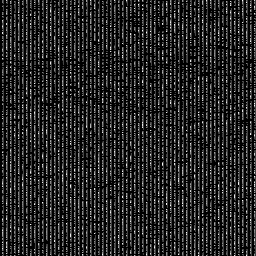

In [46]:
from IPython.display import display, Image
#read the image, creating an object
path=r'C:/Users/Mahbub/Desktop/PHD FOLDER CONFIDENTIAL/Melware/DikeDataset/Grayimg/image_l2.png'
img=Image(path)
#show picture
display(img)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

#reshape images to fit into the CNN model
img_list = np.zeros(shape = (len(images), h,w,1), dtype = np.uint8)
for j in range(len(images)):
    img_list[j,:,:,0] = np.reshape(list(images[j]), (h,w))
    
img_list = img_list.astype('float32')
img_list /= 255

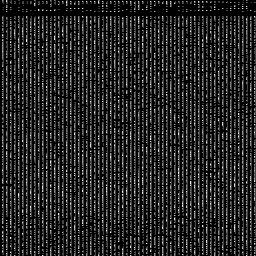

In [43]:
display(img)


In [44]:
model = Sequential()
#Conv2D Layers
model.add(Conv2D(12, (25, 25), padding='same',input_shape=img_list.shape[1:], activation = 'relu'))
model.add(Conv2D(12, (25, 25), activation = 'relu'))
#Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Conv2D Layer
model.add(Conv2D(12, (13, 13), padding='same', activation = 'relu'))
model.add(Conv2D(12, (13, 13), activation = 'relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flattening Layer
model.add(Flatten())
#Dense Layer
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 12)      7512      
                                                                 
 conv2d_5 (Conv2D)           (None, 232, 232, 12)      90012     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 116, 116, 12)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 116, 116, 12)      24348     
                                                                 
 conv2d_7 (Conv2D)           (None, 104, 104, 12)      24348     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 52, 52, 12)       0         
 2D)                                                  

In [48]:
from keras.optimizers import SGD
# Compile model 
lrate = 0.01
decay =lrate/10
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [55]:
#Training the Image Classification Model
#Change the parameters to whatever suits you
import img from Grayimg
batch_size = 512 
epochs = 10
labels = [0 for _ in img]
model.fit(benign_images, labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_split = 0.25,
              shuffle = True)


SyntaxError: invalid syntax (1351748939.py, line 3)